In [1]:
### Easiest binary classification algorithm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# visual your data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("SocialNetworkAds.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

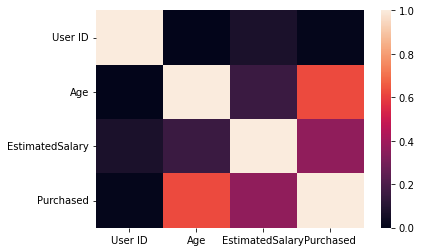

In [103]:
### Heat map
sns.heatmap(dataset.corr())

### This looks how many empty spaces are in the table.
dataset.isnull().sum()

In [ ]:
### If there are empty spaces, run these comands

dataset1=dataset[dataset.columns[2:]]   #adjust the number of columns

for i in dataset1.columns :
    dataset1[i] = dataset1[i].fillna(int(dataset1[i].mean()))
    #print(dataset[i])

dataset1.isnull().sum()

In [144]:
# Select X and y
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, [4]].values

# Transforming text to an array of number
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:,0])
print(X)

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


In [145]:
## IF needed  ()
### NORMALIZE the data from -1 to 1

print(len(X))
print(len(X[0]))

max_value= [0] * len(X[0])
min_value= [0] * len(X[0])

for i in range(0,len(X[0])):
    max_value[i] = X[:, i].max()
    min_value[i] = X[:, i].min()
    print(max_value[i])
    print(min_value[i])


for b in range(0,len(X[0])):
    for a in range(0,len(X)):
        X[a, b] = (2*((X[a, b]-min_value[b])/(max_value[b]-min_value[b])))-1

X

400
3
1
0
60
18
150000
15000


array([[1.0, -0.9523809523809523, -0.9407407407407408],
       [1.0, -0.19047619047619047, -0.9259259259259259],
       [-1.0, -0.6190476190476191, -0.5851851851851853],
       ...,
       [-1.0, 0.5238095238095237, -0.9259259259259259],
       [1.0, -0.1428571428571429, -0.7333333333333334],
       [-1.0, 0.4761904761904763, -0.6888888888888889]], dtype=object)

In [146]:
### Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = GaussianNB()
model.fit(X_train, y_train)   # predictions

y_pred = model.predict(X_test)
#print(y_pred.shape)
#print(y_test.shape)

(120,)
(120, 1)


/Users/andreaprotti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
print('Accuracy is =', accuracy_score(y_test, y_pred)*100) 
# Confusion matrix
print('\n Confusion matrix is = \n', confusion_matrix(y_test, y_pred))
# Confusion matrix metrics
print('\n Confusion matrix metrix is = \n',classification_report(y_test, y_pred))

Accuracy is = 86.66666666666667

 Confusion matrix is = 
 [[72  3]
 [13 32]]

 Confusion matrix metrix is = 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        75
           1       0.91      0.71      0.80        45

    accuracy                           0.87       120
   macro avg       0.88      0.84      0.85       120
weighted avg       0.87      0.87      0.86       120

